In [294]:
import scanpy as sc
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import muon as mu

# Import a module with ATAC-seq-related functions
from muon import atac as ac

import seaborn as sns

In [2]:
# Loaded matched counts 
rna = sc.read_h5ad("metacells/scRNA_batch1_2.raw.fibroblasts.metacells.h5ad")
atac = sc.read_h5ad("metacells/scATAC_PeakMatrix_fibro.processed.metacells.h5ad")

In [3]:
rna

AnnData object with n_obs × n_vars = 790 × 17707
    obs: 'SEACell_primary_source', 'SEACell_primary_source_purity', 'annot1', 'SEACell_type'
    layers: 'raw'

In [4]:
atac

AnnData object with n_obs × n_vars = 790 × 407383
    obs: 'SEACell_primary_source', 'SEACell_primary_source_purity', 'annot1', 'SEACell_type'
    layers: 'raw'

[Text(0, 0.5, 'SEACell metacells'),
 Text(0.5, 1.0, 'RNA+ATAC metacells < 0.9 source purity')]

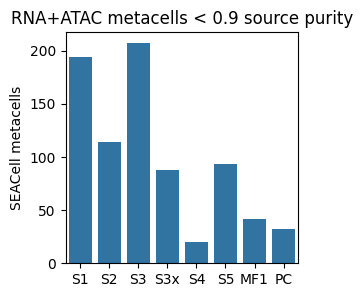

In [299]:
ax = sns.barplot(rna.obs.annot1.value_counts())

ax.set(ylabel="SEACell metacells", title="RNA+ATAC metacells < 0.9 source purity")

In [87]:
atac.obs.annot1 = atac.obs.annot1.cat.reorder_categories([
    'S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'PC'  # data does not contain MF2
])

In [88]:
rna.obs.annot1 = rna.obs.annot1.cat.reorder_categories([
    'S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'PC'  # data does not contain MF2
])

In [5]:
rna.obs.index

Index(['S2_SEACell-8', 'S1_SEACell-65', 'S3x_SEACell-36', 'S3x_SEACell-75',
       'S1_SEACell-62', 'S2_SEACell-3', 'S3_SEACell-102', 'S1_SEACell-276',
       'S2_SEACell-20', 'S2_SEACell-107',
       ...
       'S3_SEACell-269', 'S3_SEACell-205', 'S3x_SEACell-30', 'S3_SEACell-218',
       'S3_SEACell-318', 'S3_SEACell-315', 'S3_SEACell-254', 'S3_SEACell-248',
       'S3_SEACell-245', 'S2_SEACell-61'],
      dtype='object', length=790)

In [6]:
atac.obs.index

Index(['S2_SEACell-8', 'S1_SEACell-65', 'S3x_SEACell-36', 'S3x_SEACell-75',
       'S1_SEACell-62', 'S2_SEACell-3', 'S3_SEACell-102', 'S1_SEACell-276',
       'S2_SEACell-20', 'S2_SEACell-107',
       ...
       'S3_SEACell-269', 'S3_SEACell-205', 'S3x_SEACell-30', 'S3_SEACell-218',
       'S3_SEACell-318', 'S3_SEACell-315', 'S3_SEACell-254', 'S3_SEACell-248',
       'S3_SEACell-245', 'S2_SEACell-61'],
      dtype='object', length=790)

In [7]:
(rna.obs.index == atac.obs.index).all()

True

In [8]:
atac.obs

,SEACell_primary_source,SEACell_primary_source_purity,annot1,SEACell_type
S2_SEACell-8,ATAC,0.579439,S2,S2_SEACell-8
S1_SEACell-65,ATAC,0.531915,S1,S1_SEACell-65
S3x_SEACell-36,ATAC,0.694118,S3x,S3x_SEACell-36
S3x_SEACell-75,ATAC,0.760417,S3x,S3x_SEACell-75
S1_SEACell-62,RNA,0.680000,S1,S1_SEACell-62
...,...,...,...,...
S3_SEACell-315,ATAC,0.718750,S3,S3_SEACell-315
S3_SEACell-254,RNA,0.666667,S3,S3_SEACell-254
S3_SEACell-248,ATAC,0.875000,S3,S3_SEACell-248
S3_SEACell-245,RNA,0.783333,S3,S3_SEACell-245


In [9]:
rna.obs

,SEACell_primary_source,SEACell_primary_source_purity,annot1,SEACell_type
S2_SEACell-8,ATAC,0.579439,S2,S2_SEACell-8
S1_SEACell-65,ATAC,0.531915,S1,S1_SEACell-65
S3x_SEACell-36,ATAC,0.694118,S3x,S3x_SEACell-36
S3x_SEACell-75,ATAC,0.760417,S3x,S3x_SEACell-75
S1_SEACell-62,RNA,0.680000,S1,S1_SEACell-62
...,...,...,...,...
S3_SEACell-315,ATAC,0.718750,S3,S3_SEACell-315
S3_SEACell-254,RNA,0.666667,S3,S3_SEACell-254
S3_SEACell-248,ATAC,0.875000,S3,S3_SEACell-248
S3_SEACell-245,RNA,0.783333,S3,S3_SEACell-245


# Metacell QC and visualization

## RNA 

In [10]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
rna.var["mt"] = rna.var_names.str.startswith("MT-")
# ribosomal genes
rna.var["ribo"] = rna.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
rna.var["hb"] = rna.var_names.str.contains("^HB[^(P)]")

In [12]:
sc.pp.calculate_qc_metrics(
    rna, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

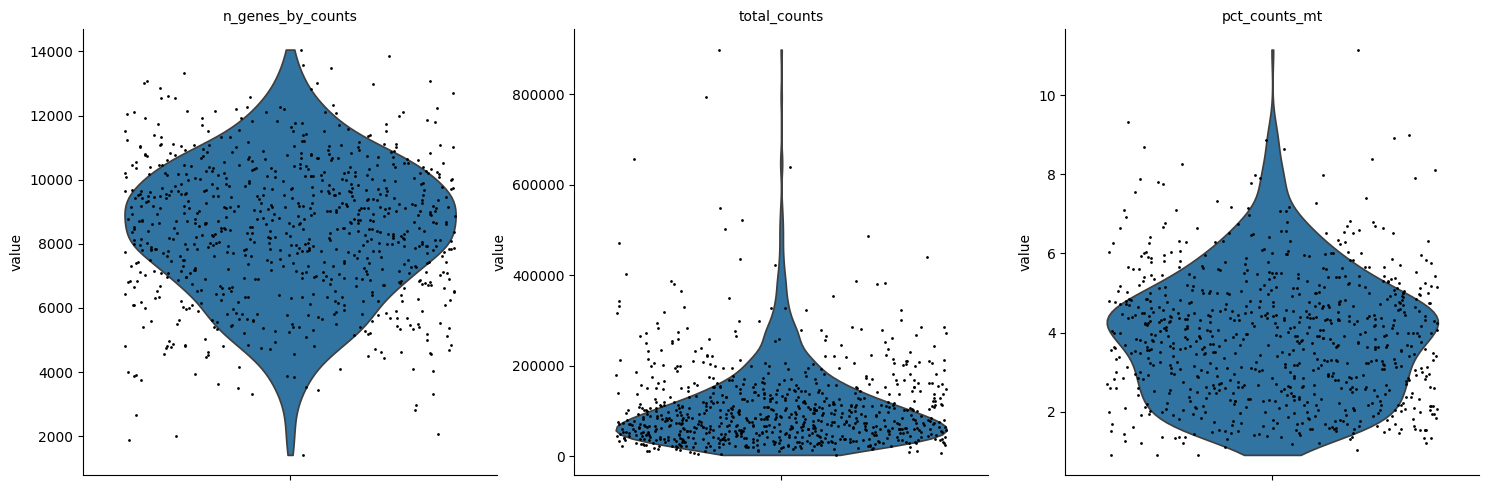

In [13]:
sc.pl.violin(
    rna,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
    size=2
)

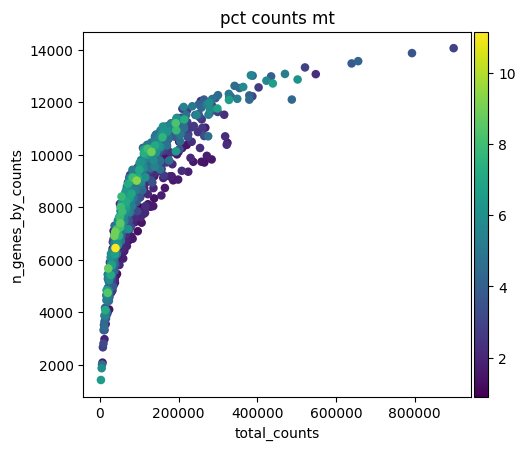

In [14]:
rcParams["figure.figsize"] = (5, 5)

sc.pl.scatter(rna, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [15]:
# Saving count data
rna.layers["counts"] = rna.X.copy()

In [16]:
# Normalizing to median total counts
sc.pp.normalize_total(rna)

# Logarithmize the data
sc.pp.log1p(rna)

In [17]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000)

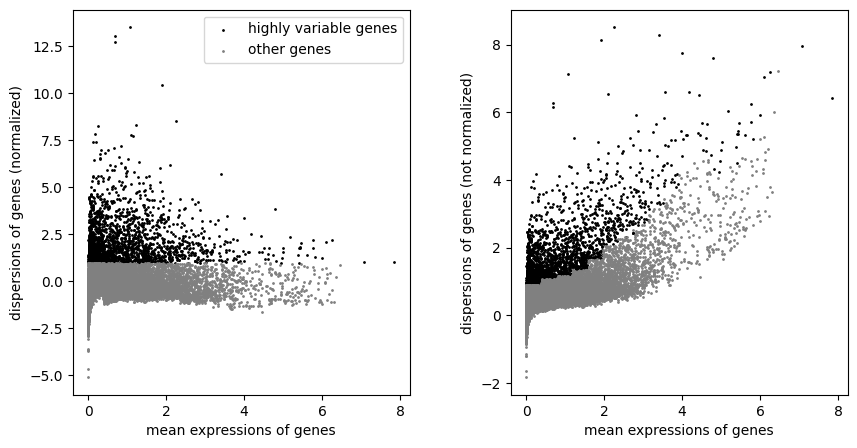

In [18]:
sc.pl.highly_variable_genes(rna)


In [19]:
sc.tl.pca(rna)

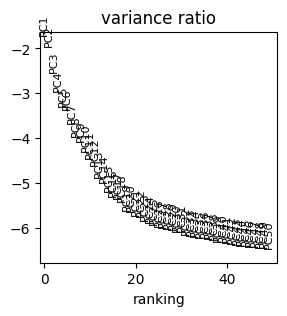

In [101]:
sc.pl.pca_variance_ratio(rna, n_pcs=50, log=True)

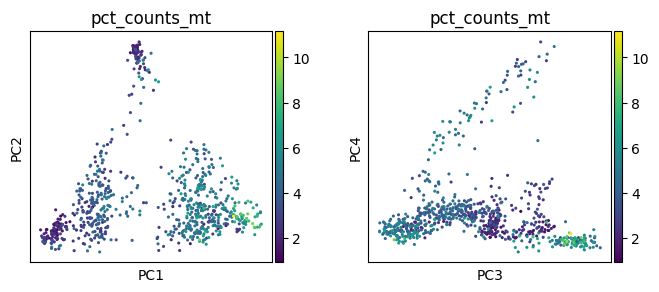

In [102]:
sc.pl.pca(
    rna,
    color=["pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3)],
    ncols=2,
    size=20,
)

In [287]:
#sc.pp.neighbors(rna, n_pcs=30, n_neighbors=12)
sc.pp.neighbors(rna, n_pcs=30, n_neighbors=12)

In [288]:
sc.tl.umap(rna)

/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


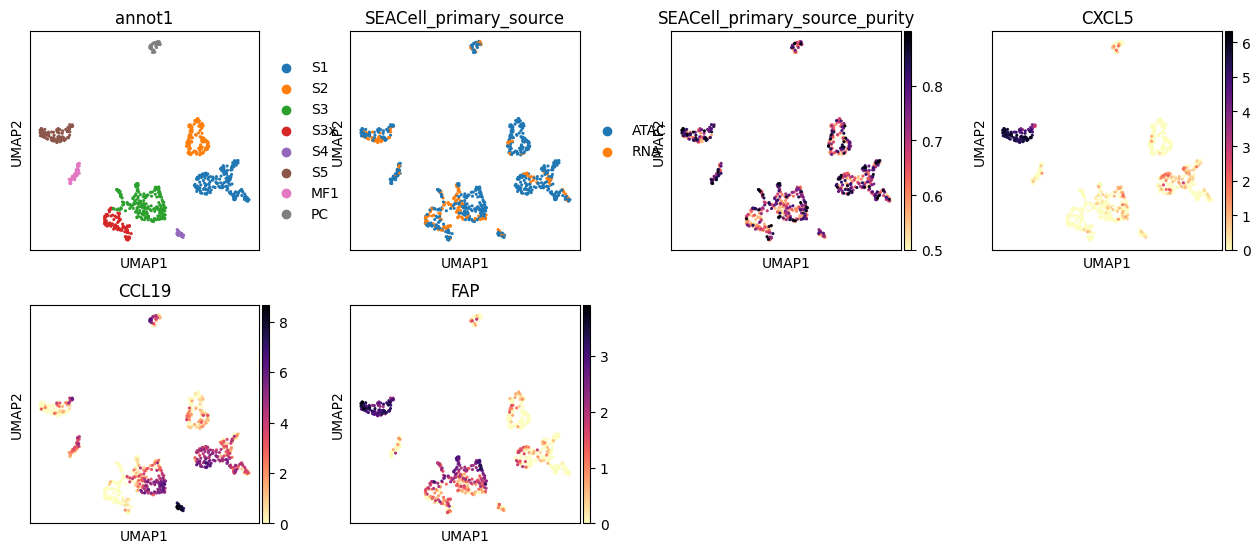

In [289]:
# Source here is the dominant contribution for the metacells being from either ATAC or RNA.
# Plot is in RNA space only

rcParams["figure.figsize"] = (3, 3)

sc.pl.umap(
    rna,
    color=["annot1", "SEACell_primary_source", "SEACell_primary_source_purity", "CXCL5", "CCL19", "FAP"],
    # Setting a smaller point size to get prevent overlap
    size=20,
    cmap="magma_r"
)

## ATAC preprocessing
Following tutorial: https://muon-tutorials.readthedocs.io/en/latest/single-cell-rna-atac/pbmc10k/2-Chromatin-Accessibility-Processing.html

In [44]:
print(atac.X[1:5, 1:5])

  (0, 2)	2.0
  (0, 3)	3.0
  (1, 1)	4.0
  (1, 2)	5.0
  (1, 3)	5.0
  (2, 2)	9.0
  (2, 3)	3.0
  (3, 1)	2.0
  (3, 2)	3.0
  (3, 3)	3.0


In [40]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

In [45]:
atac.obs

,SEACell_primary_source,SEACell_primary_source_purity,annot1,SEACell_type,n_genes_by_counts,total_counts
S2_SEACell-8,ATAC,0.579439,S2,S2_SEACell-8,143028,858818.0
S1_SEACell-65,ATAC,0.531915,S1,S1_SEACell-65,147456,645807.0
S3x_SEACell-36,ATAC,0.694118,S3x,S3x_SEACell-36,157487,1015373.0
S3x_SEACell-75,ATAC,0.760417,S3x,S3x_SEACell-75,163706,1025130.0
S1_SEACell-62,RNA,0.680000,S1,S1_SEACell-62,67395,185891.0
...,...,...,...,...,...,...
S3_SEACell-315,ATAC,0.718750,S3,S3_SEACell-315,108719,380575.0
S3_SEACell-254,RNA,0.666667,S3,S3_SEACell-254,81990,247287.0
S3_SEACell-248,ATAC,0.875000,S3,S3_SEACell-248,41876,110537.0
S3_SEACell-245,RNA,0.783333,S3,S3_SEACell-245,85974,260190.0


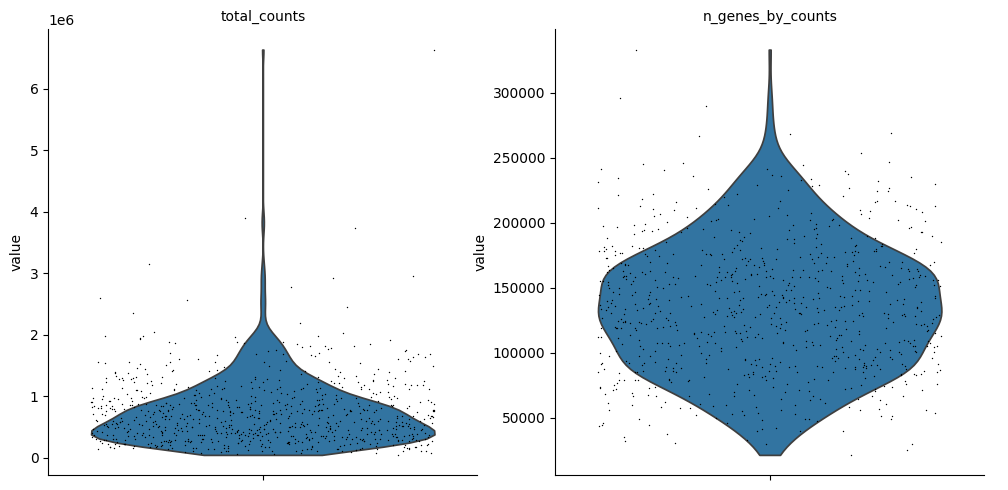

In [290]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

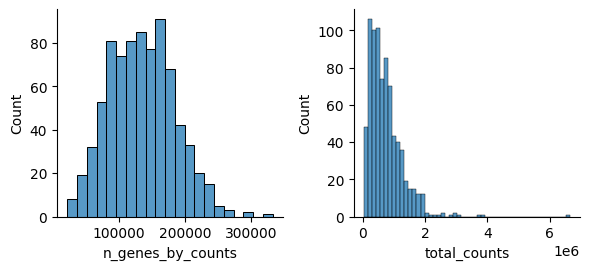

In [301]:
mu.pl.histogram(atac, ['n_genes_by_counts', 'total_counts'])

In [49]:
atac.obs['NS']=1


In [51]:
#ac.pl.fragment_histogram(atac, region='chr1:1-2000000')

### Normalization

In [52]:
# Save original counts
atac.layers["counts"] = atac.X

In [53]:
# TF-IDF normalisation
ac.pp.tfidf(atac, scale_factor=1e4)


/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/muon/_atac/preproc.py:106: RuntimeWarning: divide by zero encountered in divide
  idf = np.asarray(adata.shape[0] / adata.X.sum(axis=0)).reshape(-1)


In [54]:
sc.pp.normalize_per_cell(atac, counts_per_cell_after=1e4)
sc.pp.log1p(atac)

In [66]:
#sc.pp.highly_variable_genes(atac, min_mean=0.05, max_mean=1.5, min_disp=.5)
sc.pp.highly_variable_genes(atac, min_mean=0.01, max_mean=1.5, min_disp=.5)

/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


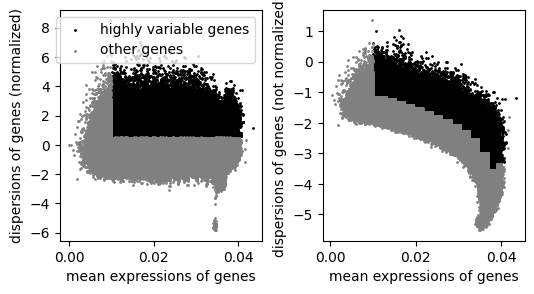

In [67]:
sc.pl.highly_variable_genes(atac)


In [68]:
np.sum(atac.var.highly_variable)

103366

In [71]:
print(atac.X[1:5, 1:5])

  (0, 3)	0.0395306643382298
  (0, 2)	0.017256141753461067
  (1, 3)	0.04167997195676938
  (1, 2)	0.026984858516360302
  (1, 1)	0.13612156779806597
  (2, 3)	0.024726731352316178
  (2, 2)	0.045870168604005855
  (3, 3)	0.1393263834149855
  (3, 2)	0.0917380364015306
  (3, 1)	0.36132643298962475


In [69]:
# Store log-transformed counts as 'raw'
atac.raw = atac

In [72]:
# LSI dimensionality reduction
ac.tl.lsi(atac)

In [73]:
# Remove first components, which reflects number of peaks and counts
atac.obsm['X_lsi'] = atac.obsm['X_lsi'][:,1:]
atac.varm["LSI"] = atac.varm["LSI"][:,1:]
atac.uns["lsi"]["stdev"] = atac.uns["lsi"]["stdev"][1:]

In [275]:
sc.pp.neighbors(atac, use_rep="X_lsi", n_neighbors=12, n_pcs=30)

In [276]:
sc.tl.umap(atac)


/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


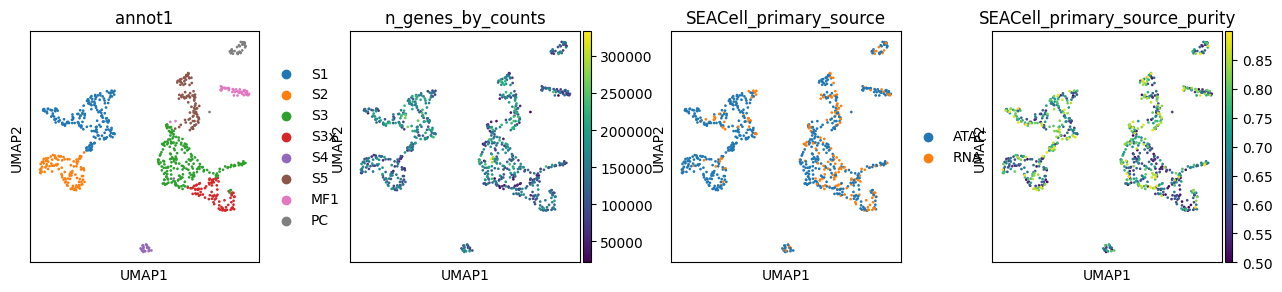

In [277]:
sc.pl.umap(atac, color=["annot1", "n_genes_by_counts", "SEACell_primary_source", "SEACell_primary_source_purity"], size=15)

In [82]:
atac.obs

,SEACell_primary_source,SEACell_primary_source_purity,annot1,SEACell_type,n_genes_by_counts,total_counts,NS,n_counts
S2_SEACell-8,ATAC,0.579439,S2,S2_SEACell-8,143028,858818.0,1,2872.496827
S1_SEACell-65,ATAC,0.531915,S1,S1_SEACell-65,147456,645807.0,1,3167.572505
S3x_SEACell-36,ATAC,0.694118,S3x,S3x_SEACell-36,157487,1015373.0,1,3176.923083
S3x_SEACell-75,ATAC,0.760417,S3x,S3x_SEACell-75,163706,1025130.0,1,3240.920116
S1_SEACell-62,RNA,0.680000,S1,S1_SEACell-62,67395,185891.0,1,2815.027293
...,...,...,...,...,...,...,...,...
S3_SEACell-315,ATAC,0.718750,S3,S3_SEACell-315,108719,380575.0,1,3148.396350
S3_SEACell-254,RNA,0.666667,S3,S3_SEACell-254,81990,247287.0,1,3174.394945
S3_SEACell-248,ATAC,0.875000,S3,S3_SEACell-248,41876,110537.0,1,2556.828171
S3_SEACell-245,RNA,0.783333,S3,S3_SEACell-245,85974,260190.0,1,3580.304570


In [84]:
atac

AnnData object with n_obs × n_vars = 790 × 407383
    obs: 'SEACell_primary_source', 'SEACell_primary_source_purity', 'annot1', 'SEACell_type', 'n_genes_by_counts', 'total_counts', 'NS', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'lsi', 'neighbors', 'umap', 'annot1_colors'
    obsm: 'X_lsi', 'X_umap'
    varm: 'LSI'
    layers: 'raw', 'counts'
    obsp: 'distances', 'connectivities'

In [85]:
rna

AnnData object with n_obs × n_vars = 790 × 17707
    obs: 'SEACell_primary_source', 'SEACell_primary_source_purity', 'annot1', 'SEACell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'annot1_colors', 'SEACell_primary_source_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw', 'counts'
    obsp: 'distances', 'connectivities'

,SEACell_primary_source,SEACell_primary_source_purity,annot1
S2_SEACell-8,ATAC,0.579439,S2
S1_SEACell-65,ATAC,0.531915,S1
S3x_SEACell-36,ATAC,0.694118,S3x
S3x_SEACell-75,ATAC,0.760417,S3x
S1_SEACell-62,RNA,0.680000,S1
...,...,...,...
S3_SEACell-315,ATAC,0.718750,S3
S3_SEACell-254,RNA,0.666667,S3
S3_SEACell-248,ATAC,0.875000,S3
S3_SEACell-245,RNA,0.783333,S3


## Joint analysis of ATAC and RNA embedding 

In [150]:

adata = sc.AnnData(
    obs=atac.obs[["SEACell_primary_source", "SEACell_primary_source_purity", "annot1"]],
    obsm={
        #'X_RNA_ATAC': np.concatenate((rna.obsm['X_pca'], atac.obsm['X_lsi']), axis=1)
        #'X_RNA_ATAC': np.concatenate((rna.obsm['X_pca'][:,1:], atac.obsm['X_lsi']), axis=1)  # without first PC for RNA
        #'X_RNA_ATAC': np.concatenate((rna.obsm['X_pca'][:,1:30], atac.obsm['X_lsi'][:,0:30]), axis=1)  # without first PC for RNA
        'X_RNA_ATAC': np.concatenate((rna.obsm['X_pca'][:,0:30], atac.obsm['X_lsi'][:,0:30]), axis=1)

    }
)

In [151]:
adata

AnnData object with n_obs × n_vars = 790 × 0
    obs: 'SEACell_primary_source', 'SEACell_primary_source_purity', 'annot1'
    obsm: 'X_RNA_ATAC'

In [152]:
sc.pp.neighbors(adata, use_rep="X_RNA_ATAC", n_neighbors=10)

In [153]:
sc.tl.umap(adata)

/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


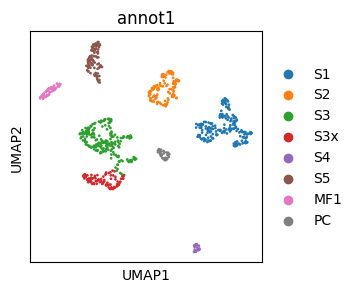

In [154]:
sc.pl.umap(adata, color=["annot1"], size=15)

In [114]:
#rna.obsm['X_pca'].shape

In [115]:
#atac.obsm['X_lsi'].shape

In [116]:
#np.concatenate((rna.obsm['X_pca'], atac.obsm['X_lsi']), axis=1).shape

In [156]:
#atac_rna = atac

In [159]:
#atac_rna.X = rna.X.copy()

### ATAC embedding overlayed by gene expression from metacells

In [172]:
atac_rna = sc.AnnData(
    obs=atac.obs[["SEACell_primary_source", "SEACell_primary_source_purity", "annot1"]],
    obsm={
        'X_lsi': atac.obsm['X_lsi']
    },
    X=rna.X,
    var=rna.var
)

In [173]:
atac_rna

AnnData object with n_obs × n_vars = 790 × 17707
    obs: 'SEACell_primary_source', 'SEACell_primary_source_purity', 'annot1'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_lsi'

In [254]:
#sc.pp.neighbors(atac_rna, use_rep="X_lsi", n_neighbors=10, n_pcs=30)
#sc.pp.neighbors(atac_rna, use_rep="X_lsi", n_neighbors=10, n_pcs=30)
#sc.pp.neighbors(atac_rna, use_rep="X_lsi", n_neighbors=10, n_pcs=30)
#sc.pp.neighbors(atac_rna, use_rep="X_lsi", n_neighbors=10, n_pcs=49)
#sc.pp.neighbors(atac_rna, use_rep="X_lsi", n_neighbors=8, n_pcs=49)
#sc.pp.neighbors(atac_rna, use_rep="X_lsi", n_neighbors=8, n_pcs=40)
#sc.pp.neighbors(atac_rna, use_rep="X_lsi", n_neighbors=8, n_pcs=30)
sc.pp.neighbors(atac_rna, use_rep="X_lsi", n_neighbors=12, n_pcs=30)

In [255]:
sc.tl.umap(atac_rna)

/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


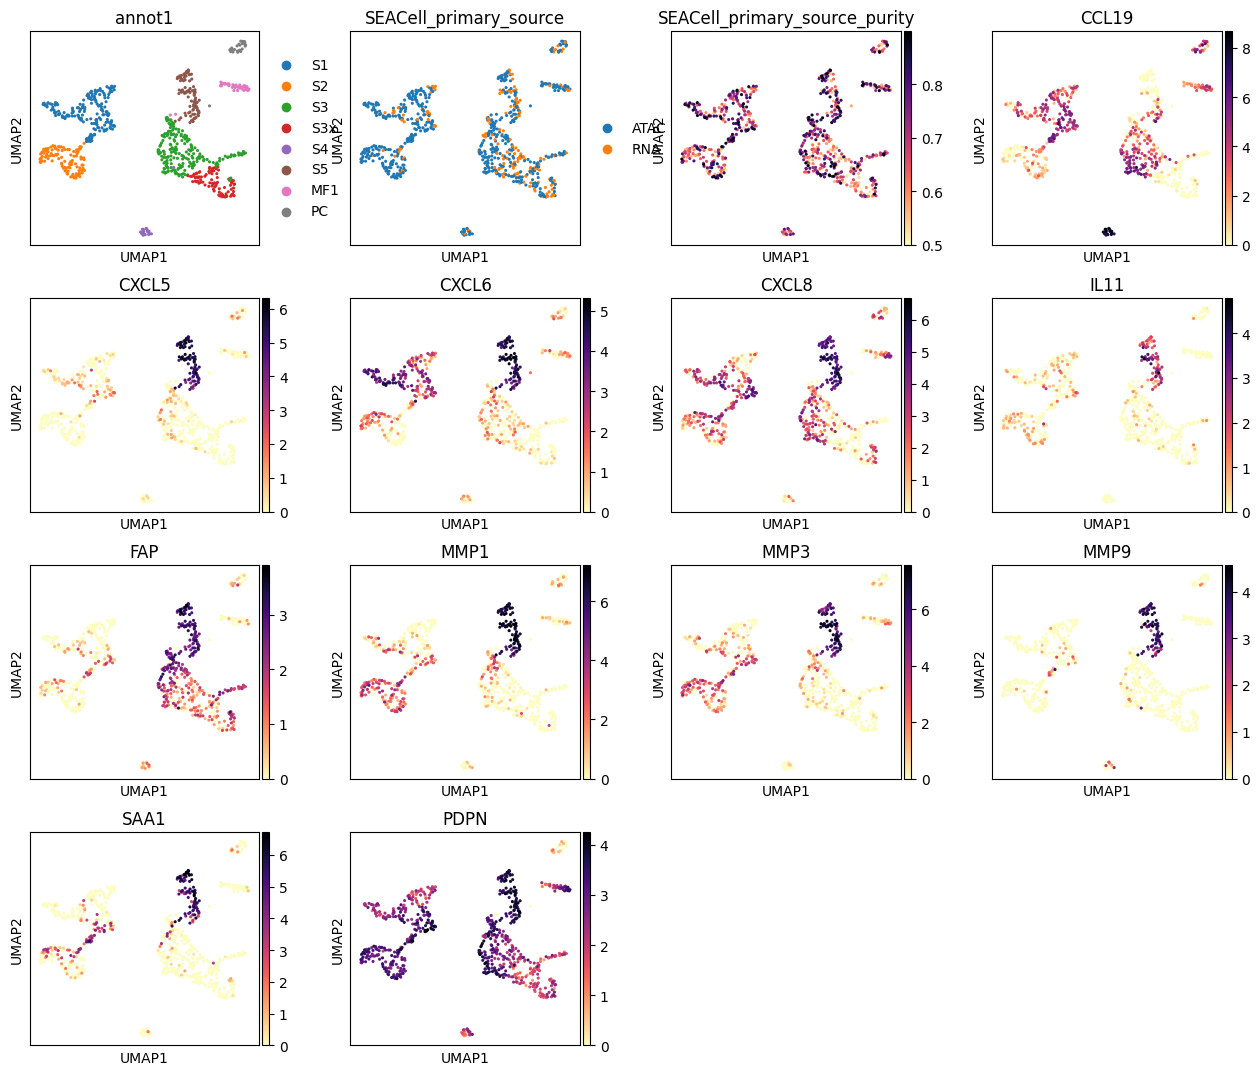

In [259]:
sc.pl.umap(atac_rna,
    color=["annot1", "SEACell_primary_source", "SEACell_primary_source_purity", "CCL19", "CXCL5", "CXCL6", "CXCL8", "IL11", "FAP", "MMP1", "MMP3", "MMP9", "SAA1", "PDPN"],
    cmap="magma_r",
    size=20)

/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


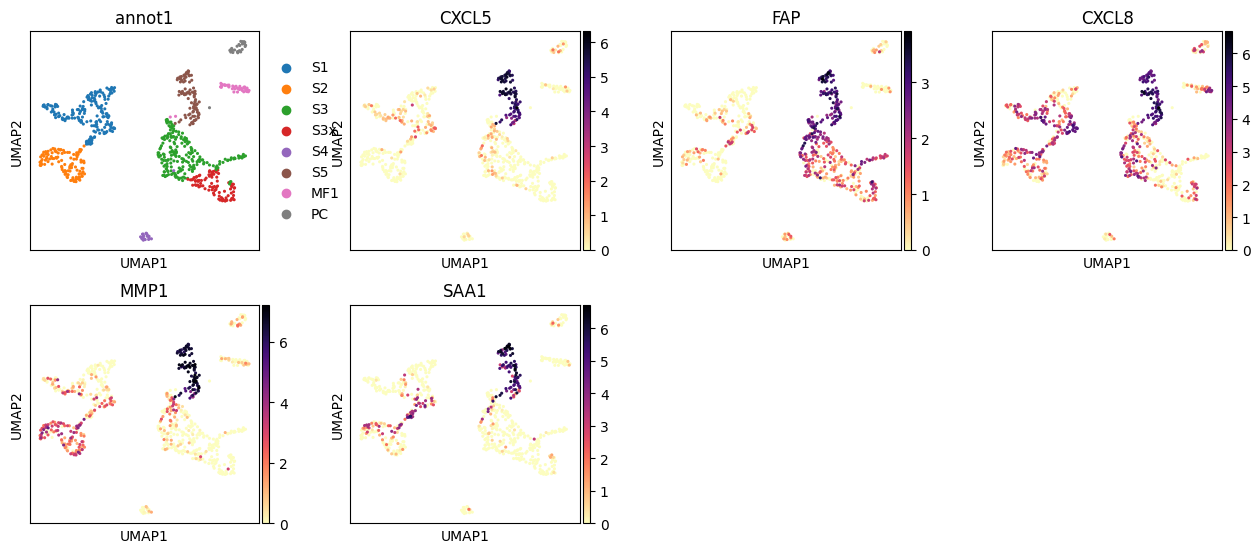

In [264]:
sc.pl.umap(atac_rna,
    color=["annot1", "CXCL5", "FAP", "CXCL8", "MMP1", "SAA1"],
    cmap="magma_r",
    save="_ATAClsi_metacell_S5_markers.pdf",
    size=20)

/home/jovyan/my-conda-envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


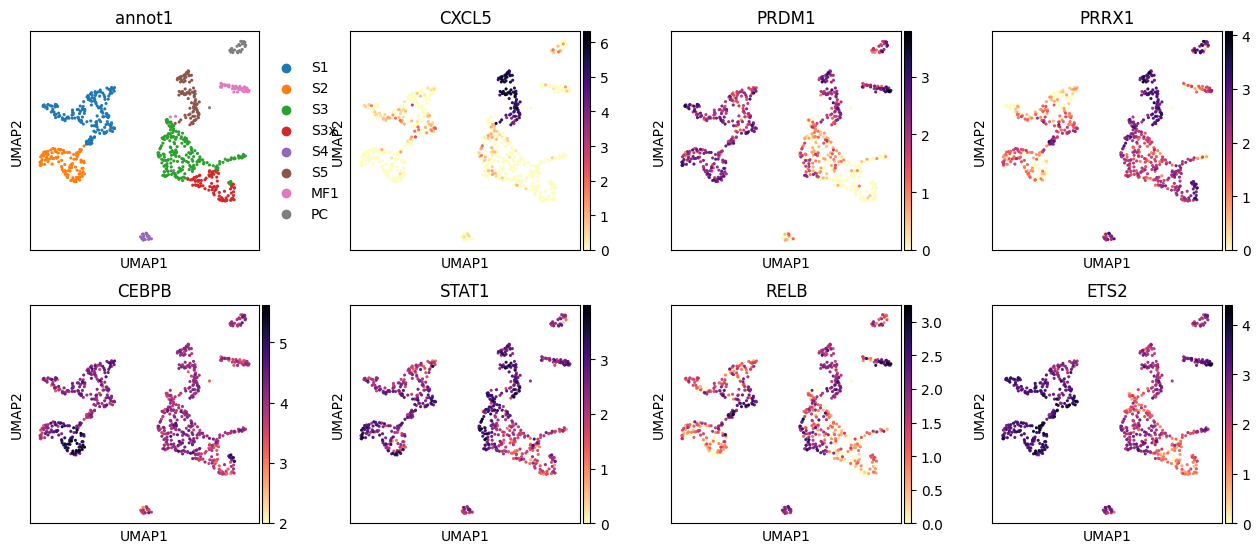

In [265]:
# Comparison with genes identified in trajectory analysis and CNMF regulon enrichment
sc.pl.umap(atac_rna, color=["annot1", "CXCL5", "PRDM1", "PRRX1", "CEBPB", "STAT1", "RELB", "ETS2"],
    size=20,
    save="_ATAClsi_metacell_S5_trajectory_regulon_markers.pdf",
    cmap="magma_r")

In [187]:
#sc.pl.umap(atac_rna, color=["annot1", "CXCL5", "FAP", "JUN"], size=15)